<a href="https://colab.research.google.com/github/andressatheotonio/InterpolationMethods/blob/master/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolação 

## Pontos 

Os pontos utilizados foram retirados do dataset "FiveThirtyEight Drug Use By Age Dataset" disponível no Kaggle através do endereço: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-drug-use-by-age-dataset.

Os pontos escolhidos foram as idades de 12 até 22 anos e a porcentagem da população nessa faixa etária que consomem álcool nos EUA.

## Métodos 

*  Método de Newton
*  Método de Lagrange
*  Spline Linear






## Importando Bibliotecas


In [0]:
import numpy as np
import matplotlib.pyplot as plt 

## Definindo pontos

In [0]:
X = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] #idades
Y = [3.9, 8.5, 18.1, 29.2, 40.1, 49.3, 58.7, 64.6, 69.7, 83.2, 84.2] #uso de álcool
n = len(X) #tamanho da lista de idades
x = [12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5] #pontos verificados

## Método de Newton

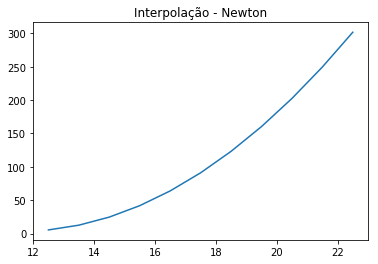

In [0]:
def matrizes(n, X, Y):
    
    m2 = []
    
    for i in Y:
        m2.append([i])
    
    m1 = []
    
    for i in range (0, n):
        z = []
        for j in range (0, n):
            z.append(0)
        m1.append(z)
    
    for i in range (0, n):
        m1[i][0] = 1
    
    for i in range (1, n):
        product  = 1
        for j in range (1, i+1):
            product *= (X[i]-X[j-1])
            m1[i][j] = product
    
    return m1, m2

m1, m2 = matrizes(n, X, Y)
m_res = np.linalg.solve(m1, m2)

pts = [] #lista de pontos para traçar o gráfico

for i in range (0,11):
  a = (m_res[1]*(x[i]-X[0]))
  b = (m_res[2]*(x[i]-X[0])*(x[i]-X[1]))
 
  p = m_res[0] + a + b
  
  pts.append(p)
  
#print(pts)

plt.plot(x,pts)
plt.title("Interpolação - Newton")
plt.show()

## Método de Lagrange

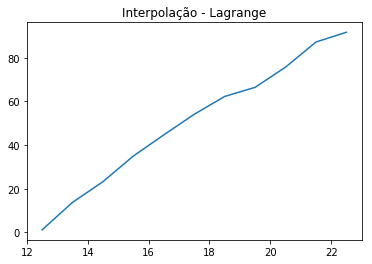

In [0]:
def matriz(X, x, n):
    m = []
    
    for i in range(0, n):
        aux = []
        for j in range (0, n):
            if i == j:
                aux.append(x-X[i])
            else:
                aux.append(X[i]-X[j])
        m.append(aux)
    
    return m

def produtoD(m, n):
    res = 1
    for i in range (0, n):
        res*=m[i][i]
    return res

def produtoL(m, line, n):
    res = 1
    for i in range (0, n):
        res*=m[line][i]
    return res

pts2 = []

for k in range (0,11):
  m = matriz(X, x[k], n)

  diagonal = produtoD(m, n)
  p = 0

  for i in range (0, n):
      L = diagonal/produtoL(m, i, n)
      p += (Y[i]*L)

  pts2.append(p)
  
#print(pts2)

plt.plot(x,pts2)
plt.title("Interpolação - Lagrange")
plt.show()

## Spline Linear

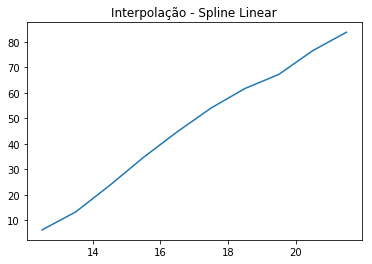

In [0]:
def splinelinear(X, Y, n, i, x):
    if i == n:
        return 0

    return Y[i] + (((Y[i+1]-Y[i])/(X[i+1]-X[i]))*(x-X[i]))
  
pts3 = []

for i in range(0,n):
  for j in range(0,n-1):
    if x[i] >= X[j] and x[i] <= X[j+1]:
       pts3.append(splinelinear(X, Y, n, j, x[i]))
      
#print(pts3)

plt.plot(x[0:n-1],pts3)
plt.title("Interpolação - Spline Linear")
plt.show()
